<a href="https://colab.research.google.com/github/wwalbrecht/stuff4students/blob/swt-tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Software Testen

## Zweck des Notebooks

Einführung wichtiger Grundbegriffe zum Testen, insbesondere zu Modultests. Interaktive Wissensvermittlung mit Beispielen in Python mit verschiedenen Test-Tools. 

## Übersicht

Nach einer kurzen Abgrenzung werden erste konkrete Tests mit verschiedenen Test-Frameworks gemacht, um den Umgang damit kennen zu lernen. Anschließend wird die Thorie zu Modultests behandelt und an Beispielen angewendet. 

## Installationen


In [ ]:
# Install PlantUML package for Diagram Rendering
%pip install iplantuml
import iplantuml

# Abgrenzung: Ansätze zur SW-Qualität 

In diesem Jupyter Notebook stehen die sogenannten Unittests (auch Modultest oder Komponententests genannt) im Mittelpunkt. Sie sollen hier in den größeren Rahmen eingeordnet werden.

Auf oberster Ebene geht es um das Qualitätsmanagement der Softwareentwicklung. Das läßt sich in zwei große Ansätze einteilen:

### Qualitätsmanagement Analytisches vs. Konstruktives

**Analytisches QM: „Produktorientiert“**, z.B.: 
- Test des fertigen Produkts (Qualität hineintesten?)
- Analyse der Zwischenprodukte (Design Review)

vs.

**Konstruktives QM: „Prozessorientiert“** z.B.: 
- Technische Maßnahmen (Methoden, Sprachen)
- Organisatorische Maßnahmen (Richtlinien, Standards), Prozessmodell

*Motivation für letzters: Qualität kann in ein System nicht 'hineingetestet' werden.* 

### Was hier **nicht** behandelt wird:

Viele Teile der Veranstaltungen wurden mit der Absicht unterrichtet, eine Vorbereitung für das Konstruktive QM zu sein. Hier in Notebook geht es jetzt nur noch um das Analytisches QM. 

Zum analytischen QM gehört, neben den hier behandelten "testenden Verfahren" auch noch, z.B.:
- Analysierende Verfahren (Metriken, z.B. zu Komplexität des Codes)
- Verifizierende Verfahren („formales Beweisen“)

Wiederholungsfrage: Welche weiteren Testarten neben den Modultests kennen sie vom V-Modell?

 **Testprozess**: Die Organisation des Testes bei größeren und insbesondere sicherheitskritischen Anwendungen erfordert viel Sorgfalt und umfangreiches Management, auch das wird hier nicht vertieft, siehe z.B.: [wiki/ISO/IEC/IEEE_29119_Software_Testing](https://de.wikipedia.org/wiki/ISO/IEC/IEEE_29119_Software_Testing) (Wie schon von anderen Prozessmodellen bekannt, weicht auch hier das Agile Vorgehen teilweise davon ab.)

 Das Testen von graphischen Benutzer-Oberflächen wird hier ebenfalls nicht gesondert behandelt. 

### Was hier im Notebook behandelt wird:

Als "testenden Verfahren" werden hier vor allem Black-Box-Tests und White-Box-Tests behandelt. Beide Verfahren gehören zu den sogenannten **dynamischen Testverfahren** (und bilden zusammen die sogenannten *strukturorientierten Verfahren*). Im Gegensatz dazu untersuchen sogenannte **statische Testverfahren** den Code ohne in 'laufen zu lassen' via z.B: Reviews oder Programm-Analysatoren (vgl. Compiler), die hier nicht betrachtet werden.

White-Box-Tests sind entweder auf den Kontrollfluß des Programms bezogen, oder auf den Datenfluß (wer schreibt, wer liest einen Wert einer Variablen). Letzteres wird hier ebenfalls nicht behandelt. 



In [ ]:
%%plantuml
@startuml

rectangle "Qualitaetssicherung (unvollstaendig)" {

rectangle "Konstruktives QM" {
  rectangle "Prozessmodelle"
  rectangle "Methoden"
}

rectangle "Analytisches QM"{

rectangle "Testverfahren " {

  rectangle "Dynamische Testverfahren" as dyn {

    rectangle "Black-Box-Tests" as bb
    rectangle "White-Box-Tests" as wb

    rectangle "Kontrollfluss-orientierte Tests" as kf
    rectangle "Datenfluss-orientierte Tests " as df

    wb --> kf
    wb --> df
  }

  rectangle "Statische Testverfahren " as stat {
    rectangle "Reviews"
    rectangle "Programm-Analysatoren"
  }
}
}
}

@enduml

### Wichtige Begriffe

- **Testen vs. Debuggen**: Beim SW-Testen prüft man eine Software auf fehlerhaftes Verhalten. Beim Debuggen versucht man den Fehler zu analysieren (die Stelle(n) im Code zu finden) und zu beheben.

- **Regressionstests**: Eine neue Unit wird vor ihrer Verwendung getestet. Wenn im weiteren Verlauf an der Software Änderungen vorgenommen werden, dann sollte getestet werden, ob das ursprünglich geforderte (und damalt testete) Verhalten immer noch in Ordnung ist. Dazu werden (ggf. über Nacht) immer wieder die alten Tests (automatisch) wiederholt ausgeführt.     

- **Exploratives Testen**: Entwerfen und Ausführen von Tests, auch um daraus für weitere Tests zu lernen, ohne feste zuvor festgelegte Testfälle; Erkundungen um unerwartete Fehler zu finden.

- **Fehlermaskierung**: Ein Defekt oder Fehlerzustand bleibt unentdeckt, weil er durch einen oder mehrere andere Fehler überdeckt oder kompensiert wird, sodass kein (oder kein eindeutig zuordenbares) Fehlverhalten auftritt. 


#### Fehler: Ursache, Zustand, Verhalten

Während im Deutschen der Begriff **Fehler** oft für unterschiedliche Aspekte genutzt wird, gibt es im Englischen getrennte Begriffe (die teils nicht ganz einheitlich verwendet werden): 

- **Error**: [Spillner2019] Eine menschliche Handlung, die zu einem falschen Ergebnis führt. Oder [ISO26262]: Abweichung zwischen einem berechneten, beobachteten oder gemessenen Wert bzw. Zustand und dem wahren, spezifizierten oder theoretisch korrekten Wert bzw. Zustand.

- **Fault (Fehlerzustand)**: Anomaler Zustand (Defekt), der zum Ausfall eines Elements oder Bauteils führen kann.

- **Failure (Fehlverhalten)**: sichtbares falsches Verhalten des Systems nach außen 

Literatur: B. Parhami, "Defect, Fault, Error,..., or Failure?," in IEEE Transactions on Reliability, vol. 46, no. 4, pp. 450-451, Dec. 1997, doi: 10.1109/TR.1997.693776.  

### weitere Referenzen:
- allgemein: [wiki/Softwarequalität](https://de.wikipedia.org/wiki/Softwarequalit%C3%A4t)
- konkreter anhand von QS-Merkmalen: Funktionalität, Zuverlässigkeit, Benutzbarkeit, ... : [wiki/ISO/IEC_9126](https://de.wikipedia.org/wiki/ISO/IEC_9126)
- [Spillner2019](https://dpunkt.de/produkt/basiswissen-softwaretest-2/)
- [wiki: ISO26262 Funktionale Sicherheit elektrischer/elektronischer Systeme in Kraftfahrzeugen](https://de.wikipedia.org/wiki/ISO_26262)

### Grenzen des Testens

Es ist im allgemeinen unmöglich, eine Funktion bezüglich aller Verwendungsmöglichkeiten zu testen. 
Dazu müssten alle möglichen Werte aller Eingabeparameter in allen Kombinationen getestet werden.

Beispiel:  bool IstGerade (unsigned char c); 
Frage: Anzahl aller Testfälle? 

Beispiel: bool funcXYZ(long x, long y); 
Frage: Anzahl aller Testfälle? 

<details>
  <summary>Tipp</summary>
  Eine long hat bei (C++11  mind.) 32 Bit. Wieviele Bit haben 2 long hintereinander?
</details>

<details>
  <summary>Lösung</summary>
  Das sind 2<sup>64</sup> Möglichkeiten bzw. Testfälle

  2<sup>64</sup> &gt; 10<sup>18</sup>, 3 Jahre haben 10<sup>17</sup> ns
</details>


# Tools und Frameworks für Unittests in Python

Ziel: Sie sollen das Handling kennen lernen, die intensivere Verwendung für verschiedene Test folgt danach. 

## doctest

Funktionstest via Python-Shell ausführen und dokumentieren zur automatischen Wiederverwendung.

Ein erster Ansatz zum Testen ist einfach das Aufrufen des Programms/seiner Funktionen von der Konsole aus und zu prüfen, ob das Ergebnis den Erwartungen entspricht. Diese Idee wird von doctests aufgegriffen und automatisiert. Wir machen das zunächst auch "von Hand" (in einzelnen Code-Zellen) und dann mit Automatisierung. 

Lit.:
- [realpython.com/python-doctest/](https://realpython.com/python-doctest/), oder 
- [www.geeksforgeeks.org/python/testing-in-python-using-doctest-module/](https://www.geeksforgeeks.org/python/testing-in-python-using-doctest-module/), und speziell für Juypter-Notebooks:
- [jupyter-tutorial.readthedocs.io/de/latest/notebook/testing/doctest.html](https://jupyter-tutorial.readthedocs.io/de/latest/notebook/testing/doctest.html)

In [ ]:
# Die zu testende Funktion:
def add(a, b):
    """ Add two numbers and return the result."""
    return a + b

Ein Test-Aufruf:

In [ ]:
add(2, 3)

Aufgabe: Erstellen sie einen weiteren Test-Aufruf:

In [ ]:
add( ..., ...)

Ergänzung der Funktionsdokumentation um **Aufrufbeispiele** (wie sie auf der Python-Console aussehen würden). Das ist ein beliebter Ansatz, um den Nutzern der Funktion eine schnelle Übersicht zur bereitgestellten Funktion zu geben. 

In [ ]:
def add(a, b):
    """ 
    Add two numbers and return the result.
    >>> add(2, 3)
    5
    >>> add(-1, 1)
    0
    >>> add(1, 1)
    0
    """
    return a + b

...und 'als Belohung' kann man damit schon Tests laufen lassen. Versuchen sie es mit der nächsten Zelle:

In [ ]:
import doctest
doctest.testmod(verbose=True)

Wenn sie die doctests in einer Python-Datei ohne Jupyter Notebook von der Konsole aus starten wollen, dann geht das mit:

<code> python -m doctest -v my_file.py </code>

Aufgabe: Erstellen sie eine Funktion und einige Doctests dazu.

In [ ]:
# Your Functions Here:

In [ ]:
doctest.testmod(verbose=True)

Auch Konsolenausgaben mit **print** können auf dieselbe Art getestet werden:

*(ggf. den Kernel neustarten, damit die obigen Test nicht mit ausgeführt werden)*

In [ ]:
def hello(name= "Anybody"):
    """
    Greet the person with the given name.
    
    >>> hello("Julia")
    'Hello Julia!'
    >>> hello()
    'Hello Anybody'
    """
    return f"Hello {name}!"

In [ ]:
import doctest
doctest.testmod(verbose=True)

Weitere Features zu doctest: [realpython.com/python-doctest/](https://realpython.com/python-doctest/)

## unittest

Das Modul unittest aus der Standard-Bibliothek von Pythen bildet ein umfangreiches Framework für Modultests (und ist leichter erlernbar als andere Frameworks wie z.B. pytest)   

- [realpython.com/ref/stdlib/unittest](https://realpython.com/ref/stdlib/unittest/), 
- [docs.python.org/3/library/unittest.html](https://docs.python.org/3/library/unittest.html)

und spziell für die Verwendung im Jupyter Notebook:
- [jupyter-tutorial.readthedocs.io/de/latest/notebook/testing/unittest.html](https://jupyter-tutorial.readthedocs.io/de/latest/notebook/testing/unittest.html)

Das Framework nutzt Vererbung zum Aufsetzen von Test. Mittels ein paar Magic-Befehlen des Jupyter Notebooks geht der Start am schnellsten.

### Installation zur Verwendung im Jupyter Notebook

In [ ]:
!pip install ipython-unittest

In [ ]:
%reload_ext ipython_unittest

### Ein erster unittest mit %%unittest_main

In [ ]:
# Use the add function as before
def add(a, b):
    return a + b

Die unittests dazu werden aufgesetzt und dank des Magics: <code>%%unittest_main</code> direkt gestartet. 

Die Tests werden dabei in einer eigens dafür erstellten Klasse *MyTest* zusammengefaßt.

*Probieren sie es aus! Die Bestandteil sehen wir uns gleich an.*

In [ ]:
%%unittest_main
class TestOfAdd(unittest.TestCase):
    def test_1_plus_1_equals_2(self):
        self.assertEqual(add(1, 1), 2)

    def test_2_plus_2_equals_4(self):
        self.assertEqual(add(-1, 1), 0)


Die Bestandteile:

- <code> class TestOfAdd(unittest.TestCase) </code>: Um die Features vom Framework in den eigenen Code zu "zauber", wird es von der Framework-Klasse "unittest.TestCase" in die eigene Test-Klasse **vererbt**. Es ist eine gute Konvention, den Klassennamen mit "Test..." zu beginnen.
- <code> self.assertEqual... </code>: mit der geerbten assert-Methode wird der erwartete Wert geprüft. Es gibt eine lange Liste von geerbten assert Methoden.

*Aufgabe:* Fügen sie oben einen Test hinzu der scheitert, damit sie die Fehlerausgaben kennen lernen.

### subTest für eine Liste von Testwerten

Verwendung: Eine Funktion mit mehreren verschiednen Werten wiederholt zu testen.

(Für den einfachen Rahmen nutzen wir wieder das Magic %%unittest_main von oben.)

In [ ]:
%%unittest_main

class TestOfAdd(unittest.TestCase):
    def test_1_plus_1_equals_2(self):
        self.assertEqual(add(1, 1), 2)

    def test_x_plus_minusx_equals_0(self):
        test_cases = [
            (-10, 10, 0),
            (1, 2, 3),
            (0, 0, 0)        
            ]
        
        for a, b, expected in test_cases:
            with self.subTest(a=a, b=b, expected=expected):
                self.assertEqual(add(a, b), expected)

### assert-Methoden 

Ein Auszug aus der langen Liste in
[docs.python.org/3/library/unittest.html](https://docs.python.org/3/library/unittest.html#assert-methods)
| Method | Meaning |
|--------|---------|
| assertEqual(a, b) |         a == b |
| assertIs(a, b) |          a is b |
| assertTrue(x) |            bool(x) is True |
| assertIn(a, b)  |         a in b |

Code-Beispiele dazu, vereinfacht mit lokalen Variablen die geprüft werden statt Funktionen:


In [ ]:
%%unittest_main

class TestExample(unittest.TestCase):

    def test_assert_equal(self):
        mylist1 = [1, 2, 3]
        mylist2 = [1, 2, 3]
        self.assertEqual(mylist1, mylist2)  # a == b)

    def test_assert_is(self):
        mylist1 = [1, 2, 3]
        mylist2 = [1, 2, 3]
        self.assertIs(mylist1, mylist2)  # a is b
        
    def test_assert_true(self):
        x = True
        self.assertTrue(x)

    def test_assert_in(self):
        mylist1 = [1, 2, 3]
        value = 3
        self.assertIn(value, mylist1)  

### Magic Kompakt mit %%unittest

Mit dem Magic <code> %%unittest </code> kann man in Juypter Notebooks Tests auch sehr kompakt notieren.

*Aufgabe: * Ändern sie den Test auch einmal so, dass er scheitert.

In [ ]:
%%unittest
"Test of add:"
assert add(1,1) == 2
"Test of add with -1 and 1:"
assert add(-1,1) == 0

### unittest ohne Jupyter Notebook

Den Kern bildet auch hier die eigene(n) Test-Klasse(n), wie bereits oben im Jupyter Notebook verwendet. 

Zusätzlicher Aufbau:
- Datei-Name: Die eigene Test-Klasse, sollte einer Python-Datei mit dem Präfix 'test' sein, dann erkennt dies das unittest Framework automatisch.
- Import: Neben *unittest* wird ggf. auch das Modul mit dem eigenen zu testenden Code importiert.
- Teststart via __main__: Dadurch laufen die Test nur dann, wenn das Modul von der Konsole aus gestartet wird. 

(Mit dem Magic %%writefile wird der Inhalt der Zelle in eine Datei geschrieben.)


In [ ]:
%%writefile myadd.py
def add(a, b):
    """ Add two numbers and return the result."""
    return a + b

In [ ]:
%%writefile test_add.py

import unittest
from myadd import add 


class TestOfAdd(unittest.TestCase):
    def test_1_plus_1_equals_2(self):
        self.assertEqual(add(1, 1), 2)

    def test_negative_one_plus_one_equals_zero(self):
        self.assertEqual(add(-1, 1), 0)

if __name__ == "__main__":
    unittest.main(verbosity=2)

In [ ]:
!python -m unittest test_add.py

In [ ]:
# Variaton: run all test*.py files in the current directory: 
!python -m unittest discover -s .

### weitere unittest Features (nicht hier)

...siehe z.B. in [realpython.com/python-unittest/](https://realpython.com/python-unittest/)
- TestSuite: Gruppen von Tests bilden
- Test Fixtures: Methoden .setUp() und .tearDown() um Code zur Vor- und Nachbereitung von Tests


## gtest für C++

Nur ein Beispiel zum Vergleich zum beliebten Test-Framework gtest (googletest) für C++. 

Zuerst Nachsehen ob gtest schon installiert ist:

In [ ]:
!whereis gtest

...sonst ggf. installieren. Hier für unter Linux /Debian; unter Windows etwas aufweniger und nicht hier.

In [ ]:
!sudo apt install libgtest-dev cmake
!cd /usr/src/gtest  # geht wohl nicht auf colab !!!
!sudo cmake .
!sudo make
!sudo cp lib/*.a /usr/lib

In der folgenden Datei ist sowohl die zu testende Funktion add als auch der Test-Code schon mit drin. In der main wird dann das Test-Framework gtest gestartet.

Sie müssen nur noch das Programm unten übersetzen und dann starten...

In [ ]:
%%writefile test.cpp
#include <gtest/gtest.h>

int add(int a, int b) { return a + b; }

TEST(AddTest, Basic) {
    EXPECT_EQ(add(2, 3), 5);
}

int main(int argc, char **argv) {
    ::testing::InitGoogleTest(&argc, argv);
    return RUN_ALL_TESTS();
}

In [ ]:
!g++ test.cpp -lgtest -lgtest_main -pthread -o test

In [ ]:
!./test

# Dynamische Tests: Black-Box-, White-Box-Tests etc.

[wiki/Black-Box-Test](https://de.wikipedia.org/wiki/Black-Box-Test): "... Hierbei werden Tests anhand der **Spezifikation/Anforderung** entwickelt. Dies bedeutet, dass Tests ohne Kenntnisse über die innere Funktionsweise/Implementierung des zu testenden Systems entwickelt werden. ..." 

[wiki/White-Box-Test](https://de.wikipedia.org/wiki/White-Box-Test): "..bei der die Tests mit Kenntnissen über die **innere Funktionsweise** des zu testenden Systems entwickelt werden. ...bei welchem der **Ablaufgraph** im Vordergrund steht. Qualitätskriterium des Tests ist es, sicherzustellen, dass Testfälle in Bezug auf die **Überdeckung des Quellcodes** gewisse Hinlänglichkeitskriterien erfüllen. ..."

Gefragt ist dabei als Qualitätkriterium jeweils wie gut die Test-Abdeckung ist. Während der Fokus bei Black-Box-Tests auf "Test Coverage" (bzgl. der geforderten Funktionalität) liegt, liegt er bei White-Box-Tests auf dem "Code Coverage".

**Grenzwertanalyse:** (Zusätzlich) Testeingaben verwenden, die geringfügig neben den Rändern der Äquivalenzklassen (siehe unten) liegen. Wenn z.B. der maximal erlaubte Werte eines Parameters 100 wäre, dann wäre es sinnvoll die Werte 99, 100, und 101 zu testen. Zum einen kann es leicht passieren, dass bei der Spezifikation der betreffenden Anforderung nicht sauber Formuliert wurde, oder auch typische Programmierfehler bzlg. der Verwendung von '>' oder '>=' oder Rundungsprobleme sprechen für solche Tests. 

**Zufallstest:** generiert (oder auch von „unbefangenen“ Benutzer. Die Problematik wer testen sollte, z.B. ggf. nicht der Entwickler wird hier nicht behandelt.) 

Skizzen zu den beiden großen Vorgehensweisen:  

In [ ]:
%%plantuml
@startuml
skinparam backgroundColor white

file Spezifikation as Spec
rectangle "Input" as Input
rectangle "Output" as Output

skinparam node {
  BackgroundColor black
  FontColor white
}
node "Black-Box f(x)" as BlackBox {
}

' Arrows  .d. Input 
Spec .d. Output
Spec .d. Input

Input -r-> BlackBox
BlackBox -r-> Output 

@enduml

In [ ]:
%%plantuml
@startuml
partition "Input" {
    }

partition "White-Box" {

  if () then ([Yes])
    :a1;
  else ([No])
    :a2;
  endif
}

partition "Output" {
    }

@enduml

# White-Box-Tests

Ziel: Es sollen möglichst viele/alle (korrekte oder inkorrekte) Verhaltensweisen einer Software untersucht werden. 

Abgrenzung: Beim Black-Box-Test ginge es bei folgender Funktion 'nur' um das Verhalten bei der Eingabe x und dem betreffenden Return Wert der Funktion - das betrachten wir später. 

Fokus: Wir betrachten im Code vor allem den **Kontrollfluß**. Eine weitere Variante wäre es, zu untersuchen, an welcher Stelle jeweils eine Variable geschrieben und an welcher anderen Stelle darauf hin gelesen wird. Diese sogenannten **Datenflussorientierte Tests** werden hier nicht weiter behandelt.

Wiki:

https://de.wikipedia.org/wiki/Dynamisches_Software-Testverfahren

https://de.wikipedia.org/wiki/Kontrollflussorientierte_Testverfahren



Dazu: Möglichst viele/alle 'Ecken'/Teile einer Software sollen bei Tests durchlaufen/**abgedeckt** werden.

Dazu: Formalisieren/Modellieren der 'Ecken'/Teile einer Software

*Aufgabe:* Welche 'Ecken'/Teile gibt es in einem Programm-Code die zu testen sind? 

*Aufgabe:* Welche sind ggf. bereits durch andere Tests mit abgedeckt?



In [ ]:
def func1(x):
    i = 0
    y = 0
    z1 = 0
    while i <= x:
        if (i % 2 == 0) and (z1 <= 10):
            y += 2
            z1 += 10
        else:
            y += 1   
        i += 1 
    return y

func1(3)

In [ ]:
%%plantuml
@startuml
start
:i = 0;
:y = 0;
:z1 = 0;
while () is ([i < x])
  if () then ([(i % 2 == 0) and (z1 <= 10)])
    :y += 2;
    :z1 += 10;
  else ([else])
    :y += 1;
  endif
  :i += 1;
endwhile ([else])
:return y;
stop
@enduml


## Kontrollflussgraph

Der Kontrollflussgraph eines Programms ( P ) ist ein gerichteter Graph

$
G = (N, E, n_{\text{start}}, n_{\text{final}})
$

mit

* $ N $ ist die Menge der Knoten: stellen die Anweisungen des Programms dar
* $ E \subseteq N \times N $ Menge von gerichteten Kanten
* $ n_{\text{start}}, n_{\text{final}} \in N $ ausgewählte Knoten für Start / Ende

Kanten werden auch als **Zweige** bezeichnet, d.h. ein Zweig vom Knoten $ i $ nach Knoten $ j $ stellt einen statischen Kontrollfluss von $ i $ nach $ j $ dar.

Ein (vollständiger) **Pfad** durch das Programm beginnt beim Start-Knoten und endet beim End-Knoten.

*Bem.: Dem entsprechend würden Anweisungen, Start- und Endkonten sowie Verzweigungen alle gleich gezeichnet werden, nämlich als runder Punkt/Knoten. Wir behalten die UML-Notation von Aktivitätsdiagrammen aber aus Gewohnheit bei.*

### Block

Ein **Block** eines Programms ist eine nicht-leere Folge von Knoten
$ k_1, \dots, k_n ,  n > 1 $, des Kontrollflussgraphen, für die gilt:

* Die Folge wird ausschließlich durch den ersten Knoten betreten.
* Falls der erste Knoten durchlaufen wird, wird die gesamte Folge in der gegebenen Reihenfolge deterministisch genau einmal durchlaufen.
* Die Folge ist bzgl. der beiden ersten Eigenschaften maximal.

Blöcke dienen zur Vereinfachung von Kontrollflussgraphen, da alle Knoten eines Blocks durch einen einzigen dargestellt werden können.

*Aufgabe:* Wo befinden sich im obigen Beispiel Blöcke?  

In [ ]:
%%plantuml
@startuml
start
partition "Block 1" {
:i = 0;
:y = 0;
:z1 = 0;
}
while () is ([i < x])
  if () then ([(i % 2 == 0) and (z1 <= 10)])
  partition "Block 2" {
    :y += 2;
    :z1 += 10;
    }
  else ([else])
    :y += 1;
  endif
  :i += 1;
endwhile ([else])
:return y;
stop
@enduml

### Vollständiger Pfad

Ein vollständiger Pfad ist eine Sequenz aus Knoten und Blöcken, die mit dem Startknoten beginnt und mit dem Endknoten endet.

### $ C_0 $-Test - Anweisungsüberdeckung 

Alle Anweisungen des Programms einmal ausführen, d.h. alle Knoten des Kontrollflussgraphen mindestens einmal besuchen.

Überdeckungsgrad (Ziel: $100 %$): $
C_0 = \frac{\text{Anzahl besuchter Knoten}}{\text{Anzahl aller Knoten}} * 100 \%
$




### $ C_1 $-Test - Zweigüberdeckung

Alle Zweige des Programms mindestens einmal durchlaufen.

Überdeckungsgrad (Ziel: $100 \%$): 
$
C_1 = \frac{\text{Anzahl besuchter Zweige}}{\text{Anzahl aller Zweige}} * 100 \%
$

*Aufgabe:* In welcher Beziehung steht die Zweigüberdeckung zur Anweisungsüberdeckung?

Tipp: Sehen sie sich folgendes Beispiel an:

In [ ]:
def inkr_if_even(x):
    if x % 2 == 1:
        x += 1
    return x

In [ ]:
%%plantuml
@startuml
start
if () then ([x%2==1])
    :x += 1;
  else ([else])
  endif
:return x;
stop
@enduml

In [ ]:
# *Aufgabe:* Test zur vollständigen Abdeckung aller Anweisungen:
inkr_if_even(???)

Welche Zweige sind daruch abgedeckt? Vielleicht so wie hier in Rot dargestellt?

In [ ]:
%%plantuml
@startuml
start
-[#red]->
if () then ([x%2==1])
    -[#red]->
    :x += 1;
    -[#red]->
  else ([else])
  endif
-[#red]->
:return x;
-[#red]->
stop
@enduml

In [ ]:
# *Aufgabe:* Zusätzlich benötiger Test zur vollständigen Abdeckung aller Zweige:
inkr_if_even(???)

*Aufgabe:* Erstellen sie eine Test-Klasse für unittest dazu. Als Vorlage hier der Test zum Beispiel weiter oben für die add-Funktion

In [ ]:
%%unittest_main

class TestOfAdd(unittest.TestCase):
    def test_1_plus_1_equals_2(self):
        self.assertEqual(add(1, 1), 2)

    def test_2_plus_2_equals_4(self):
        self.assertEqual(add(-1, 1), 0)


<details>
  <summary>Lösung </summary>
(!!!markdown cell: double-Klick for raw)  

%%unittest_main

class TestOfInkrIfEven(unittest.TestCase):
    def test_even(self):
        self.assertEqual(inkr_if_even(1), 2)

    def test_odd(self):
        self.assertEqual(inkr_if_even(2), 2)

</details>

<details>
  <summary>Frage: Wie intensiv werden Schleifen bei einer Zweigüberdeckung getest?</summary>

  Um alle Zweige zu betreten genügt es die Schleife einmal zu betreten und einmal zu umgehen.
  
  Genügt das?
</details>

### $ C_2 $-Test - Pfadüberdeckung

Da es insbesondere aufgrund von Schleifen oft unmöglich ist alle Pfade duch ein Programm vom Start- zum End-Knoten zu druchlaufen, gibt es verschiedene Variaten zur Pfadüberdeckung:

- $C_2a$: vollständige Pfadüberdeckungtest
- $C_2b$: Boundary-Interior Pfadüberdeckungtest
- $C_2c$: Strukturierter Pfadüberdeckungstest

Beim Boundary-Interior Pfadüberdeckungtest gilt die Regel: Jede Schleife wird einmal nicht betreten und genau einmal betreten und alle Pfade in dem Schleifenkörper werden einmal durchlaufen. Zusätzlich gilt: Das Schleifeninnere gilt als getestet, wenn alle Pfade, die bei **zweimaligem** Durchlaufen möglich sind, abgearbeitet wurden.

Beim Strukturierten Pfadüberdeckungstest wird anstelle des zweimaligen Durchlaufens die Anzahl der Wiederholungen auf eine Zahl $n$ begrenzt.


In [ ]:
"""Aufgabe: Wieviele verschiedene Pfade gibt es prinzipiell durch (a) func_if_tree
und (b) func_call_twice? (ohne die random_values Funktion zu betrachten)"""

def func_if_tree( conditionA, conditionB):
    if conditionA:
        if conditionB:
            print("Condition A and B are true")
        else:
            print("Condition A is true, but B is false")
    else:
        if conditionB:
            print("Condition B is true, but A is false")
        else:
            print("Both conditions are false")

def func_call_twice():
    conditionA, conditionB= random_values()
    func_if_tree( conditionA, conditionB)
    conditionA, conditionB= random_values()
    func_if_tree( conditionA, conditionB)

def random_values():
    import random
    return random.choice([True, False]), random.choice([True, False])

func_call_twice()

<details>
  <summary>Tipp</summary>
  Welche Pfade im inneren betreten werden ist unabhängig bei beiden Läufen. Es kann also jede Kombination auftreten.
</details>

In [ ]:
"""Aufgabe: Wieviele verschiedene Pfade gibt es prinzipiell durch func_while(3)?"""
def func_while(loop_count):
    i = 0
    while i < loop_count:
        i += 1
        conditionA, conditionB= random_values()
        func_if_tree( conditionA, conditionB)

func_while(3)

### Aufgabe Beispiel "count_chars"

In [ ]:
def count_chars(input_string):
    """
    Programm zaehlt alle Zeichen vor erstem 'x' und insbesondere Vorkommen von 'a'
    """
    summe = 0
    asum = 0
    i = 0

    while i < len(input_string) and input_string[i] != 'x':
        c = input_string[i]
        summe += 1
        if c == 'a':
            asum += 1
        i += 1

    return summe, asum  

summe, asum= count_chars("abacax")
print(f"Sum: {summe}, a-count: {asum}")

In [ ]:
%%plantuml
@startuml
start

:Initialisiere Variablen:\nsumme = 0\nasum = 0\ni = 0;

while (i < len(input_string) and input_string[i] != 'x') is (true)
  :c = input_string[i];
  :summe += 1;
  if (c == 'a') then (ja)
    :asum += 1;
  endif
  :i += 1;
endwhile (false)
:return summe, asum;
stop
@enduml


*Aufgabe:* Welcher minimal kurze Test wird für eine volle Anweisungsüberdeckung gebraucht?

In [ ]:
count_chars("???")

*Aufgabe:* Welcher minimal kurze Test wird für eine volle Zweigüberdeckung gebraucht? (unabhängig von Testen oben)

In [ ]:
count_chars("???")

In [ ]:
# Nebenbei: Alternative Implementierung
def count_chars(input_string):
    before_x = input_string.split('x', 1)[0]
    summe = len(before_x)
    asum = before_x.count('a')
    
    print(f"Zeichen ungleich 'x': {summe}, Vorkommen von 'a': {asum}")


### $ C_3 $-Test - Bedingungsüberdeckungstest

| Art der Bedingung            | Kürzel | Beschreibung                                                                 |
|------------------------------|--------|------------------------------------------------------------------------------|
| Einfachbedingung             | $C_3a$    | jede atomare Bedingung mit true und false testen               |
| Mehrfachbedingung            | $C_3b$    | jede true/false-Kombination der atomaren Bedingungen testen            |
| Minimale Mehrfachbedingung V1  | $C_3c_1$    | jede atomare Bedingung und jede zusammengesetzte (Teil-)Entscheidungen mit true und false testen (P. Liggesmeyer)|
| Minimale Mehrfachbedingung V2  | $C_3c_2$ | jede mögliche Kombination von Wahrheitswerten, bei denen die Änderung des Wahrheitswerts eines Terms den Wahrheitswert der logischen Verknüpfung ändern kann. (E.H. Riedemann)|

vergleiche auch: [Modified condition/decision coverage (MC/DC)](https://en.wikipedia.org/wiki/Modified_condition/decision_coverage)

Die Idee dabei: Für jede (atomare oder auch zusammengesetzte) Teil-Bedingung gibt es einen Fall, wo nur sie darüber entscheidet, ob die Bedingung als ganzes true oder false ist; wo also alle anderen Bedingungen in beiden Fällen unverändert gleich sind und nur die Änderung der gerade untersuchten Teil-Bedingung die Entscheidung herbei führt. Es soll also jede Teil-Bedingung einmal den 'Entscheider' spielen dürfen.      


*Aufgabe:* Wieviele Testfälle gibt es zu folgender Bedingung bei den drei Verfahren  $C_3a$,  $C_3b$ und $C_3c_1$?

(Bei $C_3c_1$ brauchen sie hier nur die Fälle zu summieren und keine Optimierung durch geschickte Testfälle untersuchen.)

Bedingung: **(((a and b) or c) and ((x > 77) or (y <> 77)))**

<details>
  <summary>Tipp</summary>
  Wieviele atomare Terme sind vorhanden? Wieviele (mit Operatoren!) zusammengesetzte (inkl. dem Gesammten)? Alle müssen dann auf true und false getestet werden.
</details>


<details>
  <summary>noch einer</summary>
  5 atomare 4 zusammengesetzte 
  </details>

# Code Coverage Tools

Tool-Unterstützung zum Aufdecken von noch unvollständigen Test / unvollständiger Abdeckung

[https://coverage.readthedocs.io/en/7.13.1/](https://coverage.readthedocs.io/en/7.13.1/)

https://www.pythontutorial.net/python-unit-testing/python-unittest-coverage/

Wir verwenden ein Beispiel von oben. Das geht leider nicht alles in Notebook Zellen, deshalb werden Dateien geschrieben. Auch eine erste Version des Test-Codes ist schon vorgegeben. Im ersten Schritt sollen sie nur die Zellen ausführen und sich die Ergebnisse ansehen. Anschließend gibt es Fragen und Aufgaben.

In [ ]:
%%writefile char_counter.py
def count_chars(input_string):
    """
    Programm zaehlt alle Zeichen vor erstem 'x' und insbesondere Vorkommen von 'a'
    """
    summe = 0
    asum = 0
    i = 0

    while i < len(input_string) and input_string[i] != 'x':
        c = input_string[i]
        summe += 1
        if c == 'a':
            asum += 1
        i += 1

    return summe, asum  

In [ ]:
%%writefile test_char_counter.py
import unittest
from char_counter import count_chars

class TestCountChars(unittest.TestCase):
    
    def test_with_x(self):
        self.assertEqual(count_chars("aaax"), (3, 3))

    def test_empty_string(self):
        self.assertEqual(count_chars(""), (0, 0))

    def test_x_at_start(self):
        self.assertEqual(count_chars("xabc"), (0, 0))


if __name__ == "__main__":
    unittest.main()


In [ ]:
!pip install coverage

In [ ]:
!coverage run -m unittest test_char_counter.py

In [ ]:
!coverage report -m

Es wird der gesammte Code auf Abdeckung untersucht, auch der Test-Code selbst. Er wird beim testen ja auch durchlaufen. Nebenbei dazu eine Quiz-Frage: 

Frage: Wieso sind bei test_char_counter.py nicht alle Statements durchlaufen?
<details>
  <summary>Tipp</summary>
  Das Modul test_char_counter.py wird beim Testen nicht als Hauptprogramm gestartet, sondern nur als Modul gelanden. 
</details>

*Aufgabe:* Streichen sie bei den unittests oben einen Testfall, so dass dort weniger als 100 % Coverage sind. Sehen sie sich das Ergebnis an und fügen den Testfall anschließend wieder hinzu.

*Aufgabe:* Testen sie mit der Zelle unten, ob alle Zweige in char_counter.py abgedeckt sind. Fügen sie dann den zusätzlich benötigten Test oben hinzu. 

In [ ]:
!coverage run --branch -m unittest test_char_counter.py
!coverage report -m

# Black-Box-Tests

Spezifikation bildet Basis für Testfallerzeugung

Voraussetzung: möglichst gute (formale) Spezifikation

Ziel: **„funktionale Überdeckung“**  spezifiziertes Verhalten (Eingabe  ⇒ Ausgabe) soll *repräsentativ* getestet werden.

Vorgehensweise zur Bildung von Testfällen:

1. Bildung von **Äquivalenzklassen** bzgl. Ein- / Ausgabe.
2. Nach Auswahlstrategie aus Äquivalenzklassen Testdaten bestimmen.

Basis der Suche nach Äquivalenzen: Eingaben oder Ausgaben (oder interne Zustände)

je Äquivalenzklasse ⇒ ein Verhalten erwaretet

Regeln:
- Intervall mit selber Funktionalität ⇒ 1 gültige; 2 ungültige
- n Werte, jeweils unterschiedlicher Funktion ⇒  n gültige; 1 ungültiger
- ggf. wiederholt Prüfen: Werden Werte einer Äquivalenzklasse unterschiedliche behandelt ⇒ Klasse aufteilen

Bei den **ungültigen Werten** geht es darum, zu testen, ob die Anwendung angemessen auf einen ungültigen Wert reagiert, z.B. mit einer Fehlermeldung (evtl. als Exception) und nicht etwa einfach Abstürzt. 

Falls der Wert eines Parameters bzgl. seines Datentyps nicht sicher eingehalten wird, dann müssen weitere ungültige Werte eines ungültigen Tpys geprüft werden. Falls z.B. eine Ganzzahl von einer UI oder einer Datei zunächst als Zeichenkette gelesen wird, dann sind auch unsinnige Eigaben wie 123a.1b oder eine leere Eingabe zu prüfen. 

Wenn es **mehrere Parameter** bei der Funktion gibt, wie z.B. beim Briefporto, wo das Gewicht *und* die Größe ein Rolle spielt, dann sind im Prinzip auch alle Kombinationen der jeweiligen Äquivalenzklassen zu testen. Dadurch wächst die Anzahl der Testfälle jedoch exponentiell mit der Anzahl der Parameter, entsprechend ihrem. Stellen sie sich die vielen Parameter bei der Berechung der Einkommensteuer vor!

 Eine praktische Empfehlung *(von U. Breymann, A. Spillner)* ist es, dass zumindest folgende Fälle nicht getestet werden: Wenn zwei oder mehr Parameter im selben Testfall ungültige Werte haben. Die Begründung ist, dass bereits ein ungültiger Wert einen Fehler melden wird und es sehr unwahrscheinlich ist, dass ein gleichzeitiger zweiter ungültiger Wert, den ersten ungültigen Wert "heilen" würde und das Ergebnis fälschlich nicht als ungültig erkannt würde.   

*Aufgabe:* Wählen sie einen Anwendungsbereich und bilden dazu Äquivalenzklassen.

Anregung: Steuer, Prüfungsamt, Postgebühren, e-Mail-Adr-Format, ...

### Die Definition des Wertebereichs ist entscheidend

aus: "ISTQB® Certified Tester Foundation Level
Ein Handbuch zum Selbststudium und zur Prüfungsvorbereitung", Lucjan Stapp et al., Springer 2025

Die Äquivalenzklassenbildung wird immer auf einen spezifischen Bereich angewendet, der das Problem modelliert. Manchmal ist die Wahl des Bereichs offensichtlich, aber manchmal kann die Angelegenheit etwas komplizierter sein. Betrachten Sie das Folgende ziemlich typische Beispiel.

**Beispiel.** Das Thermostat schaltet die Heizung aus, wenn die Temperatur (in vollen Gradzahlen berechnet) 21 Grad übersteigt und schaltet sie ein, wenn die Temperatur unter 18 Grad fällt. Entwerfen Sie Testfälle unter Verwendung der Äquivalenzklassenbildung.

Wie wendet man die Äquivalenzklassenbildung auf dieses Problem an? Wie viele Äquivalenzklassen wird es zu prüfen geben? Das hängt davon ab, welche spezifische Eigenschaft des Systems wir prüfen wollen. Wir können unser Problem auf mindestens drei Arten angehen:

**Methode 1.** Analysieren wir nur den Wertebereich, bemerken wir, dass das System die Heizung für Werte 22 und darüber ausschält; für Werte 17 und darunter, schält es sie ein; und für Werte zwischen 18 und 21 erfolgt keine Aktion. Daher haben wir drei Äquivalenzklassen für die „Temperatur“-Wertebereiche, bis zu 17 Grad, von 18 bis 21 Grad, und über 21 Grad (siehe Abb.
4.6a). Um diese abzudecken, brauchen wir drei Testfälle, z. B.:

- Temperatur = 15 (erwartete Ausgabe: Heizung an)
- Temperatur = 20 (erwartete Ausgabe: Heizzustand ändert sich nicht gegenüber dem vorherigen Zustand)
- Temperatur = 22 (erwartete Ausgabe: Heizung aus)

**Methode 2.** Beachten Sie, dass im Temperaturbereich 18–21 Grad die Heizung sowohl ein- als auch ausgeschaltet sein kann. Daher betrachten wir einen Wertebereich, der aus Paaren (Temperatur, Heizungszustand) besteht. In dieser Situation haben wir vier Möglichkeiten:

- Temperatur < 18, Heizung an
- Temperatur 18–21, Heizung an
- Temperatur 18–21, Heizung aus
- Temperatur > 21, Heizung aus

Also haben wir vier Situationen zu berücksichtigen. Die Situation ist jetzt etwas komplizierter als zuvor, denn vor der Testdurchführung müssen wir den entsprechenden Heizungszustand für Temperaturen von 18–21 erzwingen. Die Testfälle, die die vier oben genannten Klassen abdecken, könnten daher so aussehen:

- TC1: Temperatur = 15 (erwartete Ausgabe, Heizung an)
- TC2: Temperatur = 18 nach Anstieg von 17 (erwartete Ausgabe, Heizung ist immer noch an)
- TC3: Temperatur = 21 nach Abfall von 22 (erwartete Ausgabe, Heizung ist immer noch aus)
- TC4: Temperatur = 22 (erwartete Ausgabe, Heizung aus)

**Methode 3:** Anstatt nicht statischer Paare (Temperatur, Heizungszustand) zu betrachten, können wir Übergänge zwischen solchen Paaren betrachten. Dann wird unser Wertebereich mögliche Übergänge zwischen Paaren (Temperatur, Heizungszustand) beschreiben und aus sechs möglichen Elementen bestehen. In der folgenden Liste von Bereichselementen bezeichnen die Zahlen Temperaturen und AUS und AN bezeichnen Heizung aus und Heizung an entsprechend:
- (17, AN) → (18, AN)
- (18, AN) → (17, AN)
- (18, AUS) → (17, AN)
- (21, AN) → (22, AUS)
- (21, AUS) → (22, AUS)
- (22, AUS) → (21, AUS)

Also wir benötigen sechs Testfälle, um diese Übergänge zu simulieren. Für das erste Element ist die anfängliche Konfiguration des Systems 17 Grad, und der Heizungszustand ist an. Der Test besteht darin, die Temperatur auf 18 Grad zu erhöhen und zu sehen, ob die Heizung ausgeschaltet wird.
Beachten Sie, dass wir unserer Liste vier weitere Übergänge hinzufügen könnten, die das Verbleiben im gleichen Bereich betreffen, falls wir uns nicht auf Änderungen beschränken wollen, die Übergänge zwischen verschiedenen Temperaturbereichen beinhalten, die Äquivalenzklassen des „Temperatur“-Bereichs bilden:
- (17, AN) → (16, AN)
- (19, AN) → (20, AN)
- (19, AUS) → (18, AUS)
- (22, AUS) → (23, AUS)

Wie Sie aus dem obigen Beispiel sehen können, beeinflusst das Testziel signifikant die Form des Wertebereichs. In unserem Fall wurde die Domäne auf drei unterschiedliche Weisen modelliert:
Als eine Menge von Zahlen, die Temperaturen darstellen, als eine Menge von Paaren (Temperatur, Heizungszustand) und als eine Menge von Über
gängen zwischen solchen Paaren. Die Anwendung der Äquivalenzklassen
bildung auf jede dieser Optionen hat zur Überprüfung von Aspekten des Sys
tems geführt, die sich signifikant unterscheiden. Daher müssen wir die Form der Domäne, in der wir arbeiten werden, immer genau kennen, bevor wir die
ses Verfahren anwenden.
Beachten Sie auch, dass manchmal die Notwendigkeit, das erwartete Test
ergebnis genau zu spezifizieren, uns ermöglicht, Fehler oder Mehrdeutig
keiten in der Spezifikation zu erkennen. Bei der oben genannten ersten Me
thode ist für Daten aus der Äquivalenzklasse 18–21 nicht sehr klar, was das erwartete Ergebnis sein soll: Soll der Thermostat eingeschaltet (AN) oder aus
geschaltet (AUS) sein? Dies könnte darauf hinweisen, dass das Problem, das wir zu lösen versuchen, schlecht dargestellt ist.
Am Ende der Analyse dieses Beispiels möchten wir noch eine sehr wichtige Anmerkung machen: Für dieses spezielle Problem ist die Äquivalenzklassen
bildung nämlich keine gute Wahl (die Probleme, die wir bei der Anwendung dieses Verfahrens hatten, zeigen dies sehr deutlich). Dies liegt daran, dass die Äquivalenzklassenbildung darauf fokussiert ist, Probleme in der Implemen
tierung des (statischen) Bereichs zu erkennen, und das grundlegende Problem beim Testen, das wir in diesem Beispiel betrachten, ist die Verifizierung des Verhaltens des Thermostats. Es scheint, dass der Zustandsübergangstest hier ein geeigneteres Verfahren wäre (siehe Abschn.
4.2.4).

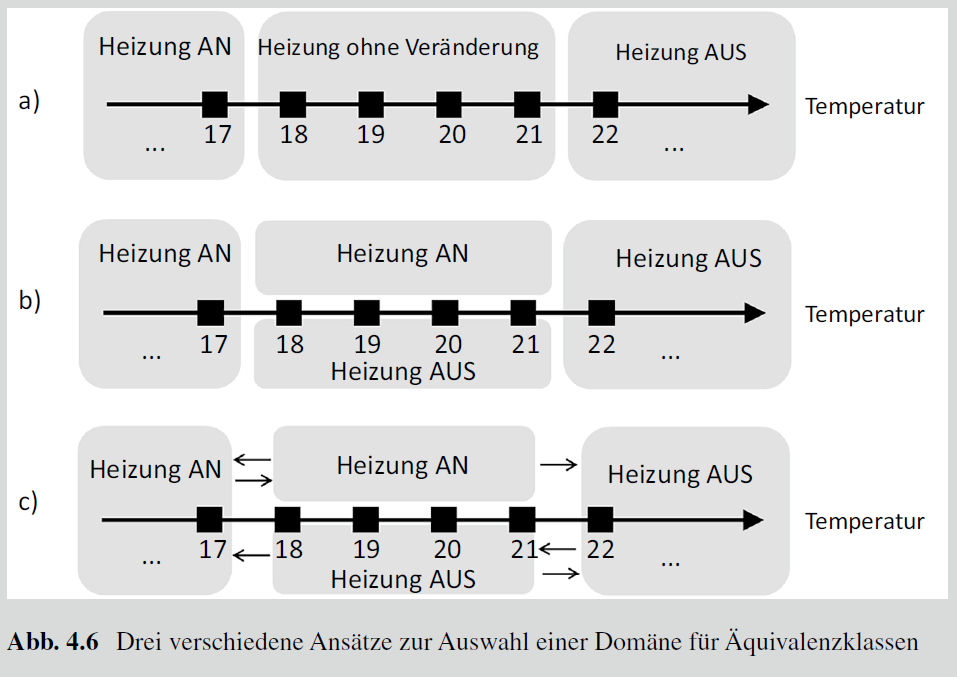

# Zustandsbasiertes Testen

Einordnung: Meist wird Zustandsbasiertes Testen als eine Unterform des Black-Box-Testens eingeordnet, also ohne Wissen über die Implementierung. Das Testen orientiert sich dann an den (hoffentlich vorhandenen vollständigen) Spezifikationen zum geforderten Zustandsverhalten (z.B. im UML-Diagramm oder via Tabellen) und nicht an dessen Implementierung. Andererseit kann beim Testen natürlich auch das Wissen um die konkret implementierten Zustände und Übergänge hilfreich sein. Aus diesem Grund werden sie auch manchmal bei sogenannten **Grey-Box-Tests** mit eingeordnet. 

Eine wichtige Basis ist dabei, dass auch Spezifiziert ist, wie das System sich verhalten soll, wenn ein Ereignis in einem Zustand eintrifft, dass nicht zum 'Normal-Fall' gehört. Also z.B. eine falsche oder ungeschickte Bedienung durch eine Menschen, was aber nicht zum Absturz des Systems führen darf, sondern zu einer wohldefinierte Reaktion führen soll. Bzgl. des Testens sind dies dann ganz normale Fälle mit spezifiziertem Verhalten, das getestet werden kann. (In der Praxis führt das Ergänzen eines Autmaten um diese "Fehlbedingungen" und ihren Reaktionen zu einer starken Vergrößerung des Automaten.) 

*Lesen ja; Schreiben: nein:"* Zum Testen eines Zustandsautomaten wird es später notwendig sein, einen bestimmten inneren Zustands als Start für einen Test zu setzen. Das ist möglich indem z.B. einfach die interne State-Variable (via Debugger oder Zusatz-Code) überschrieben wird. Davon ist in der Regel abzusehen, da es das normale Verhalten der Software evtl. verfälscht.

Im folgenden werden folgende Ansätze zum Testen eines Zustandsautomaten vorgestellt. 
- Minimaler Test: Test aller Übergänge einzeln
- Testen von Pfaden/Zustandsfolgen mittels Zustands-Übergangsbaum  

## Übergangstest - 'Zweige' im Zustandsautomaten: 

Mindestens zu Testen sind alle Übergänge eines Automaten, womit dann automatisch auch alle internen Zustände einmal durchlaufen sind. (Man könnte es vergleichen mit den obigen White-Box-Tests zur Zweig-Überdeckung.)

Ablauf zum Testen eines Zustandsübergangs: 
- es muss jeweils zunächst der betreffende innere Zustand mit entsprechenden Ereignisfolgen 'angefahren' werden; 
- dann wir das betr. Ereignis angestoßen und 
- anschließend die Systemreaktion geprüft und zwar bgzl. der zwei Eigenschaften eines Automaten:
  - Welche Aktion wird dabei ggf. angestoßen?
  - Welcher Nachfolgezustand wird dabei erreicht (ggf. gar kein Wechsel)?

Die getriggerten Aktion sind oft einfach beobachtbar (entweder 'ganz von außen' über das Systemverhalten, oder an der Modul/Unit-Grenze über die für die betr. Aktion aufgerufenen Funktionen). Der Nachfolgezustand ist evtl. nicht einfach nachzuvollziehen, da ggf. keine Ausgabe vorhanden ist, die direkt auf den aktuellen Zustand verweist. In diesem Fall könnten evtl. weitere Zustandsübergänge zu triggern sein, bis man dann aufgrund deren Aktionen wiederum eindeutige Rückschlüsse auf die dabei erreichten internen Zustände treffen kann, siehe [Lean Testing für C++-Programmierer, A. Spillner u. U. Breymann, 2016](http://leantesting.de/) 

Als Anwendungsbeispiel verwenden wir einen Automaten zur Steuerung eines einfachen Fahrzeugs, bei dem nicht direkt zwischen den Zuständen accel und reverse gewechselt werden darf. Als Ereignis zur Steuerung werden vereinfacht Buchstaben benutzt, z.B. 'b' für das Ereignis "begin".

Hier die Spezifikation der Übergänge:

| Aktueller Zustand | Eingabe | Aktion            | Nächster Zustand    |
|-------------------|---------|-------------------|---------------------|
| off_state         | b       | initVehicle()     | neutral_state       |
| neutral_state     | a       | -                 | accel_state         |
| neutral_state     | r       | -                 | accel_state         |
| accel_state       | e       | -                 | off_state           |
| accel_state       | r       | warning()         | accel_state         |
| accel_state       | n       | -                 | neutral_state       |
| reverse_state     | e       | -                 | off_state           |
| reverse_state     | a       | warning()         | reverse_state       |
| reverse_state     | n       | -                 | neutral_state       |

Die Ansteuerung eines fiktiven Motors geschieht mit den folgenden Aktionen:

| Zustand         | do / Aktion    |
|-----------------|----------------|
| accel_state     | accel()        |
| neutral_state   | neutral()      |
| reverse_state   | reverse()      |

Für alle nicht gelisteten Eingaben gilt, dass sie ignoriert werden. (Alternativ könnten sie zu einem Fehlerzustand führen.)  

In [ ]:
%%plantuml
@startuml
[*] -down-> off_state

off_state -down-> neutral_state : b / initVehicle()

neutral_state -up-> off_state : e
neutral_state -right-> reverse_state : r
neutral_state -left-> accel_state : a

accel_state --> off_state : e
accel_state --> accel_state : r / warning()

reverse_state --> off_state : e
reverse_state --> reverse_state : a / warning()

accel_state --> neutral_state : n
reverse_state -->  neutral_state : n

accel_state: do / accel()
neutral_state: do / neutral()
state reverse_state: do / reverse()

@enduml



*Aufgabe:* Finden sie die eingestreute Inkonsistenz zwischen der Tabelle und dem Diagramm und korrigieren sie.

Angenommen es soll der Übergang von accel_state nach neutral_state getestet werden.

<details>
  <summary>Mit welcher Eingabe-Sequenz von Ereignissen kommt man in den accel_state?
  </summary>
off_state --b--> neutral_state --a--> accel_state, oder kurz: "ba"
</details>

<details>
  <summary>Wie lautet der erwartete Folgezustand bei Eingabe von 'n'?
  </summary>
neutral_state
</details>

<details>
  <summary>Welche getriggerte Aktionen sind beim Übergang zu erwarten?
  </summary>
keine
</details>


*Aufgabe:* Beantworten sie die drei obigen Fragen für einen zu testenden Übergang ihrer Wahl.

Hier folgt die zu testende Implementierung. 
- Zur Vereinfachung der Überwachung liefern die getriggerten Aktionen einfach nur den Anfangsbuchstaben ihres Names in einer globalen variablen *actions*. (Das könnte bei einem echten System auch mit sogenannten Test-Stubs als Ersatz für die realen Funktionen gemacht werden.) Zum Beispiel liefert der Aufruf von initVehicle() ein 'i'. Somit kann das Verhalten einfach mit assert geprüft werden. 
- Außerdem wäre es im technischen Umfeld unüblich den Zustand als string und nicht als integer zu speichern (das vereinfacht hier die Konvertierung für lesbare Ausgaben)

- Um den inneren Zustand des Automaten zu prüfen, nutzen wir hier eine Funktion die den Zustandsname zurück liefert. Ansonsten müßte man, wie oben angesprochen indirekt über das Verhalten, die getriggerten Aktionen Rückschlüsse ziehen.  

In [ ]:
class VehicleSM:
    def __init__(self):
        self.state = "off_state"

    def get_state(self) -> str:
        return self.state
    
    def run_sm(self, signal):
        match self.state:
            case "off_state":
                if signal == "b":
                    self.init_vehicle()
                    self.state = "neutral_state"

            case "neutral_state":
                self.neutral()
                match signal:
                    case "e":
                        self.state = "off_state"
                    case "right":
                        self.state = "reverse_state"
                    case "a":
                        self.state = "accel_state"

            case "accel_state":
                self.accel()
                match signal:
                    case "e":
                        self.state = "off_state"
                    case "r":
                        self.warning()
                    case "n":
                        self.state = "neutral_state"

            case "reverse_state":
                self.reverse()
                match signal:
                    case "e":
                        self.state = "off_state"
                    case "a":
                        self.warning()
                    case "n":
                        self.state = "neutral_state"


    def init_vehicle(self):
        global actions
        actions += "i"
                
    def warning(self):
        global actions
        actions += "w"
    
    def accel(self):
        global actions
        actions += "a"
 
    def neutral(self):
        global actions
        actions += "n"

    def reverse(self):
        global actions
        actions += "r"

# Beispielverwendung:
sm = VehicleSM()
print(f"Initial state: {sm.get_state()}")
actions = ""
sm.run_sm("b")  
print(f"Triggered actions: {actions}") 
print(f"Current state: {sm.get_state()}")


*Aufgabe:* Erstellen sie Code zum Testen des Übergang von accel_state nach neutral_state mit Eingabe "n" (nur die Aufrufe noch ohne unittest) 

In [ ]:
sm = VehicleSM()
actions = ""
# (1) Startzustand erreichen...
# (2) Automat mit Eingabe aufrufen:
sm.run_sm("n")
# (3) Ausgabe der Aktionen prüfen
print(f"Triggered actions: {actions}")
print(f"Current state: {sm.get_state()}")

Hier der Code für die Nutzung von unittest. Zunächst nur mit dem Test für den ersten Übergang.

In [ ]:
%%unittest_main
class TestOfAdd(unittest.TestCase):
    def test_start_to_neutral(self):
        sm = VehicleSM()
        global actions
        actions = ""
        sm.run_sm("b")  
        # print(f"Triggered actions: {actions}")
        self.assertEqual(actions, "i")
        # print(f"Current state: {sm.get_state()}")
        self.assertEqual(sm.get_state(), "neutral_state")

*Aufgabe:* Ergenzen sie die unittests um den Übergang accel_state nach neutral_state und einen weiteren Übergang ihrer Wahl.

In [ ]:
%%unittest_main
class TestOfAdd(unittest.TestCase):
    def test_start_to_neutral(self):
        sm = VehicleSM()
        global actions
        actions = ""
        sm.run_sm("b")  
        # print(f"Triggered actions: {actions}")
        self.assertEqual(actions, "i")
        # print(f"Current state: {sm.get_state()}")
        self.assertEqual(sm.get_state(), "neutral_state")
        
    def test_neutral_to_accel(self):
        pass            

## Zustands-Übergangsbaum -'Pfade' durch den Automaten: 

Anstatt nur jeweils einen Zustandsübergang einzel zu testen, ist es ggf. auch sinnvoll jeweils (alle möglichen) Folgen von 2 oder mehr Übergängen zu testen... mit entsprechendem Mehraufwand bei der Test-Vorbereitung und einer ggf. erheblich größeren Anzahl von Testfällen.

Ein anderer Ansatz verfolgt eine vergleichbare Idee wie die Pfad-Tests bei den obigen White-Box-Tests: Welche Pfade können alle durchwandert werden? Bei den Pfad-Tests waren (While-)Schleifen ein Problem. Sehen sie das entsprechende Problem bei Automaten?

Lösung: Um das Ende solcher Test sinnvoll zu begrenzen, kann man einen Zustandsübergangsbaum zum Automaten ableiten, indem alle möglichen Abfolgen von Übergängen enthalten sind, so lange, bis sich ein besuchter Zustand wiederholt oder aus einem Zustand kein Übergang heraus führt (z.B: ein Fehlerzustand). Siehe auch hierzu: [Lean Testing für C++-Programmierer, A. Spillner u. U. Breymann, 2016](http://leantesting.de/) 

Aufbau: Man startet mit dem Zustand hinter dem Start-Konten und verzweigt dann in alle Folge-Zustände, zu denen ein Übergang von dort aus vorgesehen ist. Dann macht man mit dem ersten der so 'aufgespannten' Folge-Zustände wieder dasselbe. *(Für Baum-Experte: Erst in die Breite, dann in die Tiefe -- letzteres wäre auch denkbar. Was wäre der Vor-/Nachteil?)*

Der Übergangsbaum zum obigen Beispiel sieht wie folgt aus (ohne die do/aktionen):

- off_state
  - neutral_state: b/initVehicle()
    - off_state: e
    - accel_state: a
      - off_state: e
      - neutral_state: n
      - accel_state: r/warning()
    - reverse_state: r
      - off_state: e
      - neutral_state: n
      - reverse_state: a/warning()



*Aufgabe:* Erstellen sie einen unittest, bei dem Ausgehen vom Startzustand der ganze "Pfad" bis zu einem End-Knoten "Blatt" ihrer Wahl durchlaufen und die actionen und der End-Zustand (außer off_state) getestet wird. (Wählen sie einen anderen als ihr Tischnachbar!)

In [ ]:
%%unittest_main
class TestOfAdd(unittest.TestCase):
    def test_start_to_xyz(self):
        pass

*Bem.: Die Idee mehrere Zwischenzustände beim Testen zu Durchlaufen, kann anstatt von einem Automaten auch durch andere "Abläufe" angeleitet sein: Szenarios, oder Use-Cases.*

### Grenzen des Testens

Es ist im allgemeinen unmöglich, eine Funktion bezüglich aller Verwendungsmöglichkeiten zu testen. 
Dazu müssten alle möglichen Werte aller Eingabeparameter in allen Kombinationen getestet werden.

Beispiel:  bool IstGerade (unsigned char c); 
Frage: Anzahl aller Testfälle? 

Beispiel: bool funcXYZ(long x, long y); 
Frage: Anzahl aller Testfälle? 

<details>
  <summary>Tipp</summary>
  Eine long hat bei (C++11  mind.) 32 Bit. Wieviele Bit haben 2 long hintereinander?
</details>

<details>
  <summary>Lösung</summary>
  Das sind 2<sup>64</sup> Möglichkeiten bzw. Testfälle

  2<sup>64</sup> &gt; 10<sup>18</sup>, 3 Jahre haben 10<sup>17</sup> ns
</details>


# Vorschlag zur Kombination der Tests

1) Äquivalenzklassenbildung

2) Kontrollflussbezogen dabei: Analyse der Ergebnisse aus (1) und finden von Testfällen für noch nicht abgedeckte Zweige/Pfade/Bedingungen

3) Regressionstest (mit Test-Tool) vorbereiten

## Schluß mit testen?

**Zitat von Fowler [98]:**

> *“The older I get, the more aggressive I get about testing. I like Kent Beck’s rule of thumb that a developer should write at least as much test code as production code. Testing should be a continuous process. No code should be written until you know how to test it. Once you have written it, write the tests for it. Until the test works, you cannot claim to have finished writing the code.”*

## Wann hört man auf mit Testen:


- geforderte **Überdeckung** errreicht 
- **Testbudget oder Zeit verbraucht** ??? 
- **gefundene Fehlerzahl** sinkt unter gegebene Grenze
- **n % absichtlich von einer Gruppe implantierter Fehler** (*seeded bugs*) gefunden



